In [1]:
import pandas as pd
import requests
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

#date up to the collection
end_date = '2024-03-25'
#api url for the collection
url = f'https://api.polygon.io/v2/aggs/ticker/TQQQ/range/1/day/2017-01-01/{end_date}?adjusted=true&sort=asc&limit=50000&apiKey=RMnfdtr9nmyTjXjgbNJeX_I5pIcowZpl'
#requesting for the data
r = requests.get(url)
#compiling data with json
data = r.json()

#only collecting close data from the json by date
close = []
#only collecting high data from the json by date
high = []
#only collecting low data from the json by date
low = []
#only collecting close time data from json
time = []

#appending row by row
for d in data['results']:
    close.append(d['c'])
    high.append(d['h'])
    low.append(d['l'])
    #changing the date from timestamp to actual datetime
    time.append(datetime.fromtimestamp(int(str(d['t'])[:-3])))

#collecting all lists to a dataframe
df_stock = pd.DataFrame({'time': time, 'high': high, 'low': low, 'close': close})

In [6]:
sold = []
values = []
k = 0

#iterrating through all rows of the df_stock data
for i in df_stock.iterrows():
    #skipping the first row since there is no previous date
    if i[0] > 0:
        #if the closing price of day of observance is less than or equal to the previous closing price's 98%
        if i[1]['close'] <= df_stock.close[i[0]-1] * .98:
            #then find the next date when the closing price becomes 2% higher than the day of observance in the span of 2 trading weeks
            #if there is a date that meets the criteria, append 
                #1. how many days did it take 
                #2. how much was it sold for
            date_sold, value = next(((index, value) for index, value in enumerate(df_stock.close[i[0]+1:i[0]+50]) if (value >=i[1]['close'] * 1.02)), (None,None))
            #collecting just the days it took
            sold.append(date_sold)
            #collecting the day of observance's 
            #closing price vs. when it was sold
            values.append([i[1]['close'],value])
        #just a fail safe ---- nothing related to the result
        else:
            k+=1

In [7]:
#sorting out None because None means that there were no days in the span of 2 weeks that it went up 2%
sold2 = [j for j in sold if j != None]

In [8]:
#results
print(f"Total Trading Days: {df_stock.shape[0]}")
print(f"Number of Days that had 2% decrease from previous day: {len(sold)}")
print(f"Number of Trading Days that had 2% increase: {len(sold2)}")
print(f"Percentage of Days that had 2% increase within 2 weeks when it dropped 2% from previous day: {round(len(sold2)/len(sold),2)}")
print(f"Average Number of days it took to recover 2% when it dropped 2% from previous day: {round(np.mean(sold2),2)}")

Total Trading Days: 1251
Number of Days that had 2% decrease from previous day: 323
Number of Trading Days that had 2% increase: 297
Percentage of Days that had 2% increase within 2 weeks when it dropped 2% from previous day: 0.92
Average Number of days it took to recover 2% when it dropped 2% from previous day: 4.05


(array([164.,  77.,  33.,  12.,   3.,   4.,   0.,   2.,   1.,   1.]),
 array([1.020008  , 1.04499559, 1.06998317, 1.09497075, 1.11995833,
        1.14494591, 1.1699335 , 1.19492108, 1.21990866, 1.24489624,
        1.26988382]),
 <BarContainer object of 10 artists>)

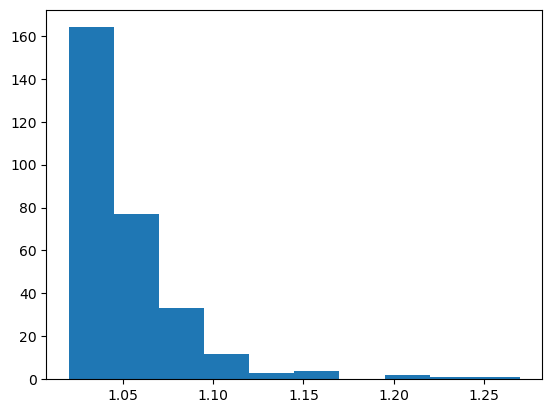

In [9]:
#increase proportion from 2% or more increase to today's price 
xx = [i[1]/i[0] for i in values if None not in i]
plt.hist(xx)

(array([232.,  30.,   8.,   6.,   6.,   6.,   3.,   4.,   1.,   1.]),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. , 28.8, 33.6, 38.4, 43.2, 48. ]),
 <BarContainer object of 10 artists>)

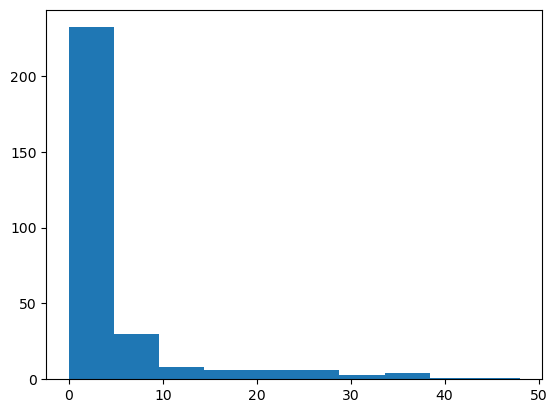

In [10]:
plt.hist(sold2)

15일 이상 불가
코드 작동 리뷰
날짜 1월24년 이상 안올라감
최적화..? 
    승률, sharpe ratio ()
